# Clustering Analysis

In [3]:
from sklearn.datasets import make_blobs

#scikit中的make_blobs方法常被用來生成聚類算法的測試數據
#make_blobs會根據用戶指定的特徵數量、中心點數量、範圍等來生成數據
#這些數據可用於測試聚類算法的效果。
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

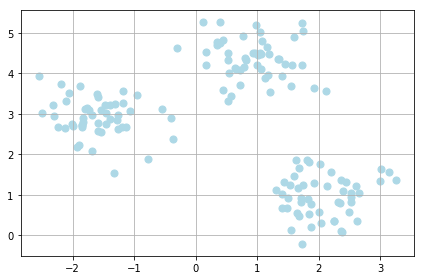

In [4]:
#將產生的數據畫出來
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='lightblue', marker='o', s=50)
plt.grid()
plt.tight_layout()

plt.show()

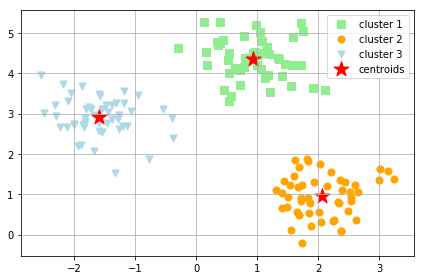

In [11]:
# 直接使用scikit-learn實作
from sklearn.cluster import KMeans
# n_init=10, 隨機做十次  自動找出SSE最小的那一次
# max_iter=300, 或是 tol=1e-04, 為中止條件
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)


# 作圖
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Using the elbow method to find the optimal number of clusters

In [10]:
# inertia_ 屬性 為SSE(樣本距離最近的聚類中心的距離平方總和。) 
print('Distortion: %.2f' % km.inertia_)


Distortion: 72.48


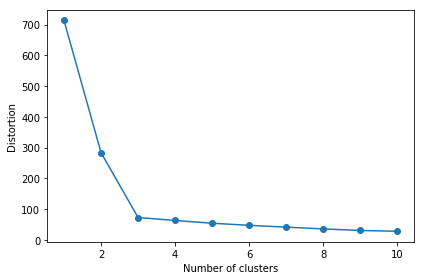

In [23]:
# 如果選取k越大 SSE必然越小
# 但分太多類別也沒有意義
# 這邊藉由SSE 的變化來選擇要分幾類
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## 階層聚類


In [24]:
# 產生亂數樣本
import numpy as np
import pandas as pd

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [25]:
#np.random.seed(123)
np.random.random_sample() # 產生(0,1)之間的亂數

0.7379954057320357

## 用距離矩陣做階層聚類


In [26]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)


row_dist


,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [27]:
pdist(df, metric='euclidean')

array([ 4.973534  ,  5.51665266,  5.89988504,  3.83539555,  4.34707339,
        5.10431109,  6.69823298,  7.24426159,  8.31659367,  4.382864  ])

In [28]:
#  Condensed distance matrix
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


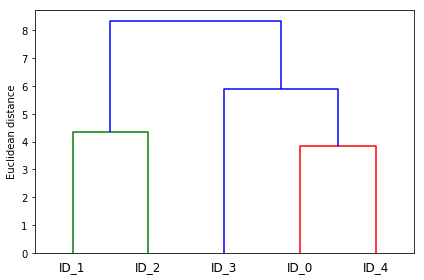

In [29]:
from scipy.cluster.hierarchy import dendrogram


row_dendr = dendrogram(row_clusters, 
                       labels=labels
                       )

plt.ylabel('Euclidean distance')

plt.tight_layout()
plt.show()

## 用scikit-learn做階層集群

In [30]:

from sklearn.cluster import AgglomerativeClustering
# 直接設定要分兩群
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## 用密度來分群 : DBSCAN

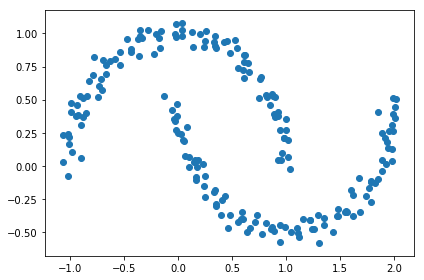

In [31]:
from sklearn.datasets import make_moons
# 製造月亮型的數據集 
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

### K-means and hierarchical clustering:


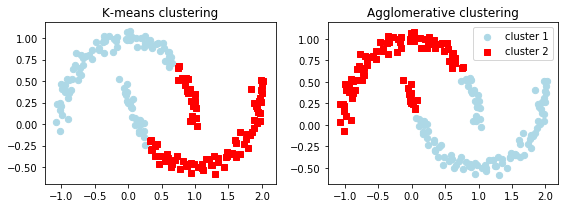

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
#K-means
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
# 階層集群
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

## Density-based clustering:


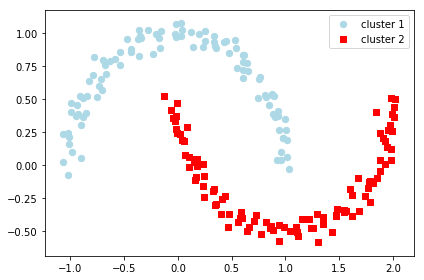

In [33]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

缺點 : eps=0.3, min_samples=5, 很難找到很好的組合
特徵很多的時候不管用    